<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터
1. 금융 데이터 수집하기
1. 테이블 결측치 처리하기
1. 정규화 처리하기

<br>
### **01 시계열 데이터 수집하기**
! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade
1. https://github.com/pydata/pandas-datareader


In [1]:
# %matplotlib inline

# from pandas_datareader import get_data_yahoo

# samsung = get_data_yahoo('005930.KS', '2017-01', '2018-01')
# samsung.Close.plot()

In [2]:
# samsung.head()

In [3]:
# samsung['2017-07'].head()

In [4]:
# from pandas_datareader import get_data_yahoo

# start_date = '2013-01-01' 
# #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.

# codes = ['GM', 'KO', '005930.KS', '031510.KQ']

# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [5]:
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [6]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


<br>
### **02 주가간의 상관계수 분석**
.corr

In [7]:
prices_corr = prices.pct_change().corr(method="spearman")  # 스피어만 상관계수
prices_corr = prices.pct_change().corr(method="kendall")   # 켄달타우 상관계수
prices_corr

,000660.KS,005930.KS,GM,KO
000660.KS,1.000000,0.227932,0.070426,0.028670
005930.KS,0.227932,1.000000,0.053770,0.022919
GM,0.070426,0.053770,1.000000,0.185511
KO,0.028670,0.022919,0.185511,1.000000


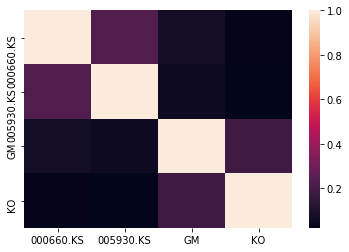

In [8]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

In [9]:
# 상관계수란?
# 두 변수간의 방향성의 일치도를 -1 ~ 1 사이의 값으로 계산
# 공분산을 각각의 표준편차로 나눈 값

# **_2 Day 금융분석 내용 실습_**
**python for finance**

## Save Date to CSV
1. 데이터 프레임 자료를 CSV로 저장하기
1. 저장할때 이제부턴 전처리가 중요하다

In [10]:
## Review & 데이터 저장및 활용

In [11]:
# # 이 내용은 따라해보세요 먼저 실습해서 보여주기
# from pandas_datareader import get_data_yahoo
# start_date = '2013-01-01' 
# codes = ['GM', 'KO', '005930.KS', '000660.KS']
# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close
# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [12]:
# prices.info()

In [13]:
# prices.isnull().sum()

In [14]:
# prices = prices.fillna(method='ffill')
# prices.isnull().sum()

In [15]:
# prices = prices.dropna()
# prices.info()

In [16]:
# # # 새로운 내용
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [17]:
## 지난번 수업 복습 및 데이터 적용
# pd.read_csv()

In [18]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


In [19]:
prices.isnull().sum()

000660.KS    0
005930.KS    0
GM           0
KO           0
dtype: int64

<br>
### **03 Value At Risk**
**일일 손실확률**과 **표준편차**를 사용하여, 해당 종목의 오차범위내 최대 손실가능 금액을 계산한다 [code link](https://www.quantstart.com/articles/Value-at-Risk-VaR-for-Algorithmic-Trading-Risk-Management-Part-I)

    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.

In [20]:
code   = prices.columns[0]
price  = prices[code].pct_change()

### 금융 용어 정리
[참고블로그](https://m.blog.naver.com/PostView.nhn?blogId=hyoungwk&logNo=10073916047&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

In [21]:
# 1,000,000 원 (초기자금)
P    = 1e6                     

In [22]:
# 99% 신뢰구간 (confidence interval)
c    = 0.99                    

In [23]:
# mu : 가격변화 평균값
# 통계학 : 모집단의 모평균
mu     = np.mean(price)
mu

0.0010858922070207386

In [24]:
# sigma : 가격의 변화량 (고정 변동성)
# 통계학 : 모집단의 모분산 (sigma의 제곱)
# 통계학 : 표본집단에서는 표본분산 s 제곱으로 표본분산의 제곱근이 "표준편차" 이다)
sigma  = np.std(price)
sigma

0.02057999225011458

## 분산
[정리된 블로그](http://openuiz.blogspot.com/2016/12/blog-post.html)
1. '편차'는 각 값이 평균에서의 거리
1. 편차들의 평균을 '분산' ('분산된 정도'를 의미)
1. '분산'을 직접 계산하면 음수가 나오므로 기하평균을 사용하여 양수값의 공식을 만든다


## 평균의 종류
1. 산술평균 (극단값에 취약하다)
1. 조화평균
1. 기하평균
1. 제곱평균 (변화율이 가장 적다)

## 공분산
1. 각 요소가 대응되는 상대요소에 대한 영향력
1. X와 Y의 요소별 편차차이값의 평균
1. $+$ 면 양의관계, $-$ 는 음의관계, 0 은 관계가 없다
1. 절대값의 크기는 제한되어 있지 않다. 따라서 상관관계가 등장하게 되는 이유다
1. 분산은 자신과 자신의 공분산 값이다

## 결정계수 R^2
1. 상관계수 값을 제곱해서 나온 값
1. 회귀분석의 정확도를 판단하는 값으로 클수록 회귀성이 높음을 알 수 있다
1. 결정계수 공식은 선형, 비선형에 따라 공식이 차이가 있다

In [25]:
# 정규분포 모델을 활용
from scipy.stats import norm
c = 0.99

## 신뢰구간
#### 구글에서 standard normal distribution 이미지를 검색

[출처](https://medium.com/@youngji/%EC%B6%94%EC%A0%95-estimation-b8e4f7fb3e6c)
1. 데이터의 **표본평균, 중간값** 에서는 측정하지 못하는 **구간별 확률** 및 **확률별 결과값** 을 계산 가능하다
1. 정규모델의 기본정의 0 ~ 1 사이의 값을 갖는 **독립된 배반사건**의 확률별 분포를 시각화
1. **독립** : 다음 사건에 이전 사건이 영향을 미치지 않는다
1. **배반사건** : 앞/뒤, 남/녀, 단지 2개의 결과만 갖는 사건

<img src="https://cdn-images-1.medium.com/max/1600/1*_WNdwbD53fq92NHEu6XoDQ.png" align="left" width='500'>

In [26]:
# alpha : 시장의 Beta(Kospi지수/nasdaq500)를 1로 가정하고, 해당종목의 초과 수익률을 계산한다
# alpha : 통계학 유의수준 ( 표본 - 샘플의 변동성 )
# alpha 초기값은 0 이다

# Percent point function
alpha  = norm.ppf( 1-c , mu , sigma )
alpha

-0.046790329011810294

## 평균과 표준편차
<img src="http://slidesplayer.org/slide/11273696/61/images/43/%E2%85%A4.+%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC%EC%99%80+%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8+%ED%8F%89%EA%B7%A0%EA%B3%BC+%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8+%EC%9C%84%EC%9D%98+%EB%8D%B0%EC%9D%B4%ED%83%80%EB%8A%94+%EC%95%84%EB%9E%98%EC%9D%98+%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC+%EA%B7%B8%EB%9E%98%ED%94%84+%ED%98%95%ED%83%9C%EB%A1%9C+%ED%91%9C%EC%8B%9C%EB%90%9C%EB%8B%A4..jpg" align="left" width="500">

In [27]:
# Beta 베타 (베타 계수라고도 함)는 일정 기간 동안 관련 벤치 마크의 성과를 비교하여 특정 보안의 변동성을 측정
# Beta 기본값은 1 이다 (시장이 움직일 떄 보안가격이 함께 움직인다)

Scipy 
## scipy.stats import norm
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

1. **norm.ppf** : Percent point function (inverse of cdf — percentiles).
1. **norm.cdf** : cdf(x, loc=0, scale=1) Cumulative distribution function.

In [28]:
# var 계산
var    = P - P * ( alpha + 1 )
c, code, round(var, 2), round(var/P * 100, 2)

(0.99, '000660.KS', 46790.33, 4.68)

In [29]:
# 신뢰구간이 90% 일떄 Var
# 직접 치면서 생각하기
c = 0.9
alpha  = norm.ppf( 1-c , mu , sigma )
var    = P - P * ( alpha + 1 )
c, code, round(var, 2), round(var/P * 100, 2)

(0.9, '000660.KS', 25288.43, 2.53)

## VaR 함수정리

In [30]:
def var_cov_var(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    codes = prices.columns
    for code in codes:
        price  = prices[code].pct_change()
        mu     = np.mean(price)
        sigma  = np.std(price)
        alpha  = norm.ppf( 1-c , mu , sigma )
        var    = P - P * ( alpha + 1 )
        result.append([code, c, round(var, 2), round(var/P * 100, 2)])

    df         = pd.DataFrame(result)
    df.columns = ['Code' ,'신뢰구간', '최대손실금액 (Value at Risk)', '리스크 비율']
    df         = df.sort_values('리스크 비율', ascending=True)
    return df

P    = 1e6                     # 1,000,000 원 (초기자금)
c    = 0.99                    # 99% 신뢰구간 (confidence interval)
df = var_cov_var(P,c,prices)
df

,Code,신뢰구간,최대손실금액 (Value at Risk),리스크 비율
3,KO,0.99,20098.42,2.01
2,GM,0.99,35409.47,3.54
1,005930.KS,0.99,36216.11,3.62
0,000660.KS,0.99,46790.33,4.68


In [31]:
# 리스크 비율이 다름은 무엇을 의미하나??
# 결과해석 : 정규성 검정을 함께 대략 짐작 가능하다

## 단점 
1. 특정한 확률적 신뢰도하에서 특정시간내 발생가능한 손실가능금액을 추정한다
1. VaR은 계산이 쉽고 직관적인 결과값을 도출 가능해서 널리 사용된다.(실무에서 사용하기에 용이하다)
1. 단점은 tail Risk (long tail 현상) 을 제대로 파악 못하기 때문에 비난을 받는다